In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

### 1. 화소처리

In [1]:
# add(src1, src2[, dst[, mask[, dtype]]]) -> dst
# src1: 첫번째 입력영상
# src2: 두번째 입력영상
# dst: 덧셈 연산의 결과
# mask: 마스크 영상
# dtype: 출력영상의 타입 (예, cv2.CV_8U, cv2.CV_32F)

## add, subract, addweighted, absdiff, multiply, divivde

In [2]:

src = cv2.imread("./fig/lenna.png", cv2.IMREAD_COLOR)

if src is None:
    print("image read failed")
    sys.exit()

dst1 = cv2.add(src, 100) # 클리핑
#dst1 = np.clip(src + 100., 0, 255).astype(np.uint8)

dst2 = cv2.add(src, (0, 0, 250, 0)) # 클리핑

cv2.imshow("src", src)
cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)

cv2.waitKey()
cv2.destroyAllWindows()

In [3]:

src1 = cv2.imread("./fig/lenna.png", cv2.IMREAD_GRAYSCALE)
src2 = np.zeros((220, 220), np.uint8)
cv2.circle(src2, (110, 110), 80, 200, -1)
cv2.circle(src2, (110, 110), 40, 50, -1)

if src is None:
    print("image read failed")
    sys.exit()

# cv2.divide, cv2.multiply()
dst1 = cv2.add(src1, src2)

dst2 = cv2.subtract(src1, src2)
dst3 = cv2.addWeighted(src1, 0.8, src2, 0.2, 0.0)
dst4 = cv2.absdiff(src1, src2)
dst5 = cv2.divide(src1, 2)
dst6 = cv2.multiply(src1, 2)

cv2.imshow("src1", src1)
cv2.imshow("src2", src2)
cv2.imshow("add", dst1)
cv2.imshow("subtract", dst2)
cv2.imshow("addWeighted", dst3)
cv2.imshow("absdiff", dst4)
cv2.imshow("divide", dst5)
cv2.imshow("multiply", dst6)

cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
src = cv2.imread("./fig/rose.jpg", cv2.IMREAD_COLOR)
background = np.ones_like(src)*255

weight = np.arange(0, 1, 0.01)
# print(weight)

for i in weight:
    dst = cv2.addWeighted(src, i, background, 1-i, 0.0)
    cv2.imshow('dst', dst)

    if cv2.waitKey(100) == 27:
        break

cv2.destroyAllWindows()

### 2. BGR 채널 분리/조합

In [ ]:
## cv2.split(m, mv=None) -> dst
# m: 다채널 컬러영상
# mv: 츨력영상
# dst: 출력영상의 리스트

## cv2.merge(mv, mv=None) -> dst
# mv: 입력영상의 리스트

# RGB to Grayscale
# Y = 0.299R + 0.587G + 0.114B 

In [5]:
src = cv2.imread("./fig/rose.jpg")

if src is None:
    print('image read failed')
    sys.exit()

b, g, r = cv2.split(src) #
dst = cv2.merge((r, g, b)) #

cv2.namedWindow("rose", cv2.WINDOW_NORMAL)
cv2.imshow("rose", src)
cv2.imshow("rgb", dst)
cv2.imshow("b", b)
cv2.imshow("g", g)
cv2.imshow("r", r)


cv2.waitKey()
cv2.destroyAllWindows()

### 3. 영상 히스토그램

In [12]:
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
# images: 입력영상 리스트(리스트로 입력)
# channels: 채널리스트, 3 채널의 경우 [0,1,2]
# mask: 마스크 영상입력, 영상전체는 None으로 지정
# histSize: 히스터그램 빈의 크기
# range: 히스토그램의 최솟값과 최댓값
# hist: 계산된 히스토그램, numpy.ndarray 타입
# accumulate: 기존의 히스토그램을 누적할경우 True

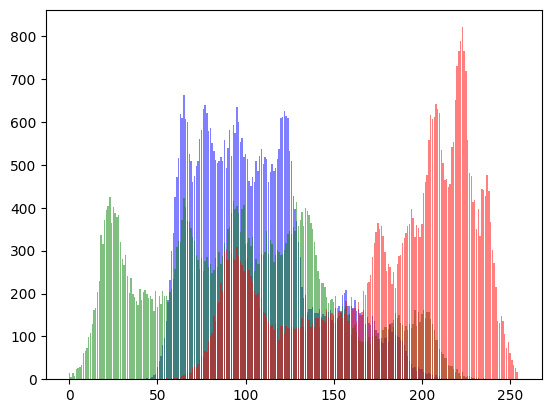

In [6]:
src = cv2.imread("./fig/lenna.png", cv2.IMREAD_COLOR)

if src is None:
    print("Image read failed")
    sys.exit()

hist_b = cv2.calcHist([src], [0], None, [256], [0, 256]) # (256, 1)
hist_g = cv2.calcHist([src], [1], None, [256], [0, 255])
hist_r = cv2.calcHist([src], [2], None, [256], [0, 255])

# colors = ['b', 'g', 'r']
# bgr_planes = cv2.split(src)

# for (p, c) in zip(bgr_planes, colors):
#     hist = cv2.calcHist([p], [0], None, [256], [0, 256])
#     plt.plot(hist, color=c)

# plt.plot(hist_b, color = "b")
# plt.plot(hist_g, color = "g")
# plt.plot(hist_r, color = "r")
# plt.show()

plt.bar(np.arange(len(hist_b)), hist_b[:,0], color = "b", alpha = 0.5)
plt.bar(np.arange(len(hist_g)), hist_g[:,0], color = "g", alpha = 0.5)
plt.bar(np.arange(len(hist_r)), hist_r[:,0], color = "r", alpha = 0.5)
plt.show()

cv2.imshow("lenna", src)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 4. 히스토그램 정규화

In [2]:
# cv2.normalize(src, dst=None, alpha=None, beta=None, norm_type=None, dtype=None, mask=None) -> dst
# src: 입력영상
# dst: 결과영상
# alpha: 정규화 최소값 (예, 0)
# beta: 정규화 최댓값 (예, 155)
# norm_type: cv2.NORM_MINMAX
# dtype =  -1, src와 같은 type

In [ ]:
src = cv2.imread('fig/puppy_shrink.png')
# src = cv2.imread('fig/mri_brain.jpeg')
# src = cv2.imread('fig/autumn.jpg', cv2.IMREAD_REDUCED_COLOR_4)
# src = cv2.imread('fig/manjang.jpg')


if src is None:
    print('Image load failed!')
    sys.exit()

# minMaxLoc(src[, mask]) -> minVal, maxVal, minLoc, maxLoc
# smin, smax, _, _ = cv2.minMaxLoc(src)

dst_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1)
# dst = np.clip(255*(src-smin)/(smax-smin) + 0, 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)

cv2.waitKey()

cv2.destroyAllWindows()